<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-25.3" data-toc-modified-id="Figure-25.3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 25.3</a></span></li><li><span><a href="#Figure-20.1" data-toc-modified-id="Figure-20.1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 20.1</a></span></li><li><span><a href="#Figure-20.2" data-toc-modified-id="Figure-20.2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 20.2</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 25
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import pearsonr

## Figure 25.3

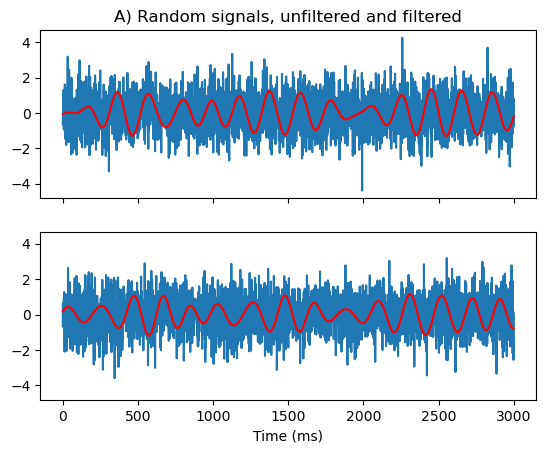

In [3]:
# generate a random signal of 3 seconds
s_rate = 1000

randsig1 = np.random.randn(3*s_rate)
randsig2 = np.random.randn(3*s_rate)

# % now filter at 5 Hz
f = 5                                                                # frequency of wavelet in Hz
time = np.arange(-1, 1 + 1/s_rate, 1/s_rate)                         # time for wavelet, from -1 to 1 second in steps of 1/sampling-rate
s = 6/(2*np.pi*f)                                                    # width of Gaussian
wavelet = np.exp(2*np.pi*1j*f*time) * np.exp(-time**2 / (2*s**2))

# FFT parameters
n_wavelet =  len(wavelet)
n_data = len(randsig1)
n_convolution = n_data+n_wavelet-1
half_of_wavelet_size = len(wavelet)//2

# FFT of wavelet and EEG data
convolution_result_fft = np.fft.ifft(np.fft.fft(wavelet, n_convolution) * np.fft.fft(randsig1, n_convolution))*np.sqrt(s)/10
filtsig1 = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size].real
anglesig1 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

convolution_result_fft = np.fft.ifft(np.fft.fft(wavelet, n_convolution) * np.fft.fft(randsig2, n_convolution))*np.sqrt(s)/10
filtsig2 = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size].real
anglesig2 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

fig, ax = plt.subplots(2,1,sharex='all', sharey='all')
ax[0].plot(randsig1)
ax[0].plot(filtsig1, 'r')
ax[0].set_title('A) Random signals, unfiltered and filtered')

ax[1].plot(randsig2)
ax[1].plot(filtsig2, 'r')
_=ax[1].set_xlabel('Time (ms)')

## Figure 20.1

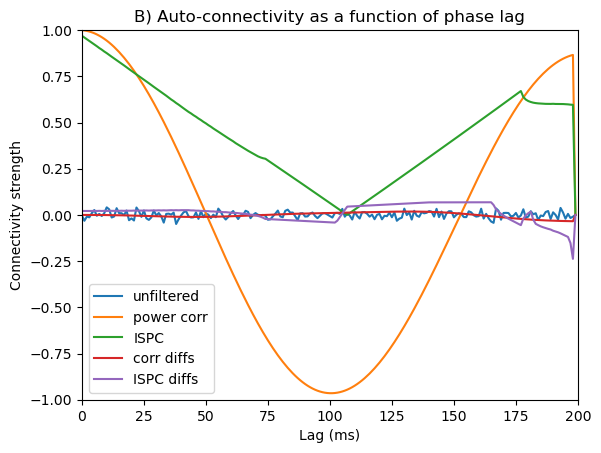

In [5]:
from scipy.stats import pearsonr
# initialize output correlation matrix
correlations = np.zeros((5, int(1000/f)))

for i in range(1, int(1000/f)):

    # corr of unfiltered random sig
    corr, _ = pearsonr(randsig1[:-i], randsig1[i:])
    correlations[0, i-1] = corr

    # corr of filtered sig
    corr, _ = pearsonr(filtsig1[:-i], filtsig1[i:])
    correlations[1, i-1] = corr

    # phase clustering
    correlations[2, i-1] = np.abs(np.mean(np.exp(1j * (np.angle(anglesig1[:-i] - anglesig1[i:])))))


    # diff of correlations of filtered signal
    corr, _ = pearsonr(filtsig2[:-i], filtsig2[i:])
    correlations[3, i-1] = corr - correlations[1, i-1]

    # difference of phase clusterings
    correlations[4, i-1] = np.abs(np.mean(np.exp(1j * (np.angle(anglesig2[:-i] - anglesig2[i:]))))) - correlations[2, i-1]


plt.plot(correlations.T)
plt.legend(['unfiltered','power corr','ISPC','corr diffs','ISPC diffs'])
_=plt.setp(plt.gca(), 'xlim', [0,200], 'ylim', [-1,1], 'xlabel', 'Lag (ms)', 'ylabel', 'Connectivity strength', 
           'title', 'B) Auto-connectivity as a function of phase lag')